In [1]:
import numpy as np

## Step 1: Develop the hypothesis.

The hypothesis is simply the implementation of the sigmoid function.

In [2]:
def hypothesis(X, theta, learning_rate):
    z = np.dot(theta, X.T)
    return (1 / (1 + np.exp(-(z))) - learning_rate)

## Step 2: Determine the cost function.

In [3]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta, 1e-07)
    return(
        -(1 / len(X)) * np.sum(y * np.log(y1) + (1 - y) * np.log(1 - y1)))

## Step 3: Update the theta values.

Theta values need to keep updating until the cost function reaches its minimum. We should get our final theta values and the cost of each iteration as output.

In [4]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta, 1e-07)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h - y) * X.iloc[:, i])
        J.append(cost(X, y, theta))
    return(J, theta)

## Step 4: Calculate the final prediction and accuracy

Use the theta values that come out of the `gradient_descent` function and calculate the final prediction using the sigmoid function. Then, calculate the accuracy.

In [5]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta, 1e-07)
    for i in range(len(h)):
        h[i] = 1 if h[i] >= 0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))]) / len(y)
    return(J, acc)

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv("Heart1.csv")
# from https://github.com/bhushan97122/Heart-Disease-Prediction/blob/master/heart1.csv
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


In [10]:
df = pd.concat([pd.Series(1, index = df.index, name = '00'), df], axis = 1)
df.head()

,00,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,1,41,0,1,130,204,172,0,1.4,2,0,2,1
3,1,56,1,1,120,236,178,0,0.8,2,0,2,1
4,1,57,0,0,120,354,163,1,0.6,2,0,2,1


In [13]:
X = df.drop(columns=["00", "target", "thal"])
y = df["target"]

In [14]:
print("X shape: {} \ny shape: {}".format(X.shape, y.shape))

X shape: (303, 10) 
y shape: (303,)


In [15]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 25000)

/var/folders/3v/tc_2xy_s57ldggtzm77xml6c0000gn/T/ipykernel_39520/1377213262.py:4: RuntimeWarning: invalid value encountered in log
  -(1 / len(X)) * np.sum(y * np.log(y1) + (1 - y) * np.log(1 - y1)))


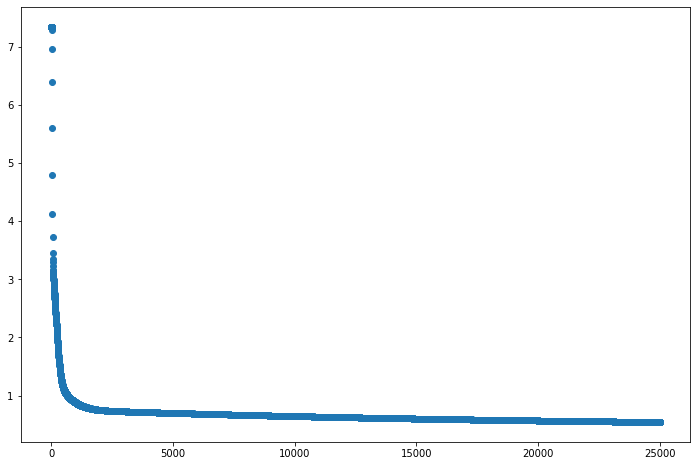

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

1e-07